In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_excel("TemperatureForecasting.xlsx")
data.head()

,Slno,datetime,conditions,winddir,visibility,temp,windspeed,pressure,humidity,dewpoint,time,date
0,1,2006-01-01T21:00:00Z,overcast,ssw,NaN,60,13.8,30.02,62,50,21:00:00,2006-01-01
1,2,2006-01-01T18:00:00Z,unknown precipitation,ssw,NaN,60,12.7,29.95,76,54,18:00:00,2006-01-01
2,3,2006-01-01T15:00:00Z,unknown precipitation,sw,3.0,61,19.6,29.90,91,59,15:00:00,2006-01-01
3,4,2006-01-01T12:00:00Z,NaN,west,NaN,78,16.1,29.76,49,62,12:00:00,2006-01-01
4,5,2006-01-01T09:00:00Z,NaN,nw,NaN,78,4.6,29.68,43,59,09:00:00,2006-01-01


In [3]:
#to check null values
data.isnull().sum()

Slno              0
datetime          0
conditions    25795
winddir           0
visibility    33140
temp              0
windspeed      1871
pressure        361
humidity          0
dewpoint          0
time              0
date              0
dtype: int64

In [4]:
#storing timestamp seperately for later use
new_df=pd.DataFrame(data.iloc[:,1])
new_df.head()

,datetime
0,2006-01-01T21:00:00Z
1,2006-01-01T18:00:00Z
2,2006-01-01T15:00:00Z
3,2006-01-01T12:00:00Z
4,2006-01-01T09:00:00Z


In [5]:
#dropping columns with null values
data.drop(['Slno'],axis=1, inplace=True)
data.drop(['visibility'],axis=1, inplace=True)
data.drop(['conditions'],axis=1, inplace=True)
data.drop(['datetime'],axis=1,inplace=True)
data.drop(['date'],axis=1,inplace=True)
data.drop(['time'],axis=1,inplace=True)

In [6]:
data.isnull().sum()

winddir         0
temp            0
windspeed    1871
pressure      361
humidity        0
dewpoint        0
dtype: int64

In [7]:
#imputing null values with mean
from sklearn.preprocessing import Imputer
imputer=Imputer()
data.iloc[:,3:4] = imputer.fit_transform(data.iloc[:,3:4])
data.iloc[:,2:3] = imputer.fit_transform(data.iloc[:,2:3])


C:\Users\KIIT\Anaconda3\dekstop\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [8]:
#all null values removed 
data.isnull().sum()

winddir      0
temp         0
windspeed    0
pressure     0
humidity     0
dewpoint     0
dtype: int64

In [9]:
#Label Encoding for categorical data winddir
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
data.iloc[:,[0]]=label_encoder.fit_transform(data.iloc[:,[0]])
data.head()

,winddir,temp,windspeed,pressure,humidity,dewpoint
0,12,60,13.8,30.02,62,50
1,12,60,12.7,29.95,76,54
2,13,61,19.6,29.90,91,59
3,14,78,16.1,29.76,49,62
4,8,78,4.6,29.68,43,59


In [10]:
#OneHotEncoder for winddir
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(categorical_features=[0],sparse=False)
data=ohe.fit_transform(data)
data

C:\Users\KIIT\Anaconda3\dekstop\lib\site-packages\sklearn\preprocessing\_encoders.py:392: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


array([[ 0.  ,  0.  ,  0.  , ..., 30.02, 62.  , 50.  ],
       [ 0.  ,  0.  ,  0.  , ..., 29.95, 76.  , 54.  ],
       [ 0.  ,  0.  ,  0.  , ..., 29.9 , 91.  , 59.  ],
       ...,
       [ 0.  ,  0.  ,  0.  , ..., 29.85, 55.  , 43.  ],
       [ 0.  ,  0.  ,  0.  , ..., 29.88, 49.  , 43.  ],
       [ 0.  ,  0.  ,  0.  , ..., 29.88, 47.  , 44.  ]])

In [11]:
#clean data
data=pd.DataFrame(data)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,60.0,13.8,30.02,62.0,50.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,60.0,12.7,29.95,76.0,54.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,61.0,19.6,29.90,91.0,59.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,78.0,16.1,29.76,49.0,62.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,78.0,4.6,29.68,43.0,59.0


In [12]:
#concatenating clean data with timestamp stored in new_df
data=pd.concat([data, new_df], axis=1)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,datetime
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,60.0,13.8,30.02,62.0,50.0,2006-01-01T21:00:00Z
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,60.0,12.7,29.95,76.0,54.0,2006-01-01T18:00:00Z
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,61.0,19.6,29.90,91.0,59.0,2006-01-01T15:00:00Z
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,78.0,16.1,29.76,49.0,62.0,2006-01-01T12:00:00Z
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,78.0,4.6,29.68,43.0,59.0,2006-01-01T09:00:00Z


In [13]:
#renaming column names according to their specific characteristics
data.rename(columns={17:'temp',18:'windspeed',19:'pressure',20:'humidity',21:'dewpoint'}, inplace=True)

In [14]:
#converting datetime column to timetsamp format
data.iloc[:,22]=pd.to_datetime(data.iloc[:,22])

In [15]:
#setting index to timestamp
data.index = data.datetime
data.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,temp,windspeed,pressure,humidity,dewpoint,datetime
datetime,,,,,,,,,,,,,,,,,,,,,
2006-01-01 21:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,60.0,13.8,30.02,62.0,50.0,2006-01-01 21:00:00+00:00
2006-01-01 18:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,60.0,12.7,29.95,76.0,54.0,2006-01-01 18:00:00+00:00
2006-01-01 15:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,61.0,19.6,29.90,91.0,59.0,2006-01-01 15:00:00+00:00
2006-01-01 12:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,78.0,16.1,29.76,49.0,62.0,2006-01-01 12:00:00+00:00
2006-01-01 09:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,78.0,4.6,29.68,43.0,59.0,2006-01-01 09:00:00+00:00


In [16]:
#resampling according to days and taking the mean values
data = data.resample('D').mean()
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4068 entries, 2006-01-01 00:00:00+00:00 to 2017-02-19 00:00:00+00:00
Freq: D
Data columns (total 22 columns):
0            3684 non-null float64
1            3684 non-null float64
2            3684 non-null float64
3            3684 non-null float64
4            3684 non-null float64
5            3684 non-null float64
6            3684 non-null float64
7            3684 non-null float64
8            3684 non-null float64
9            3684 non-null float64
10           3684 non-null float64
11           3684 non-null float64
12           3684 non-null float64
13           3684 non-null float64
14           3684 non-null float64
15           3684 non-null float64
16           3684 non-null float64
temp         3684 non-null float64
windspeed    3684 non-null float64
pressure     3684 non-null float64
humidity     3684 non-null float64
dewpoint     3684 non-null float64
dtypes: float64(22)
memory usage: 731.0 KB


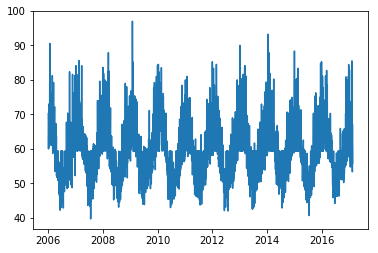

In [17]:
#imputing all the missing values after resampling the data
data.iloc[:,:] = imputer.fit_transform(data.iloc[:,:])

plt.plot(data.temp)

In [18]:
#splitting data into X_train and X_test
X=data.iloc[:,0:17]
X_new=data.iloc[:,18:]
X=pd.concat([X, X_new], axis=1)
X_train=pd.DataFrame(X.iloc[0:3600,:])
X_test=pd.DataFrame(X.iloc[3600:,:])
X_test.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,windspeed,pressure,humidity,dewpoint
datetime,,,,,,,,,,,,,,,,,,,,,
2015-11-10 00:00:00+00:00,0.0,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.00,0.0000,0.1250,...,0.4375,0.1250,0.0625,0.0,0.0,0.1250,9.43125,30.097500,75.7500,52.1875
2015-11-11 00:00:00+00:00,0.0,0.0000,0.0625,0.1250,0.0,0.0,0.0,0.00,0.0000,0.1875,...,0.1250,0.0000,0.1875,0.0,0.0,0.0625,7.93750,30.106875,69.3125,50.3125
2015-11-12 00:00:00+00:00,0.0,0.0000,0.0000,0.0625,0.0,0.0,0.0,0.25,0.0625,0.0625,...,0.0000,0.3125,0.1250,0.0,0.0,0.0000,7.78750,29.980625,75.9375,55.0625
2015-11-13 00:00:00+00:00,0.0,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.00,0.0000,0.0000,...,0.0000,0.4375,0.3750,0.0,0.0,0.1250,13.25625,30.025625,66.3125,51.0000
2015-11-14 00:00:00+00:00,0.0,0.0625,0.0000,0.0000,0.0,0.0,0.0,0.00,0.0000,0.0000,...,0.0625,0.5625,0.0625,0.0,0.0,0.0000,11.88750,30.076250,59.6250,48.1875


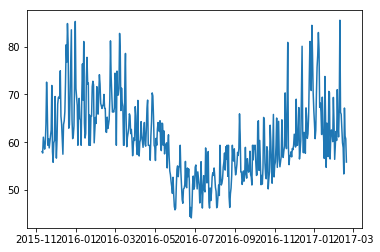

In [19]:
#splitting data into Y_train and Y_test
Y=pd.DataFrame(data.iloc[:,17])

Y_train=pd.DataFrame(Y.iloc[0:3600,:])
Y_test=pd.DataFrame(Y.iloc[3600:,:])
plt.plot(Y_test)

In [20]:
#scaling the features to a single universal unit
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [21]:
#Fitting the LinearRegression model
from sklearn.linear_model import LinearRegression
clf=LinearRegression()
clf.fit(X_train, Y_train)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

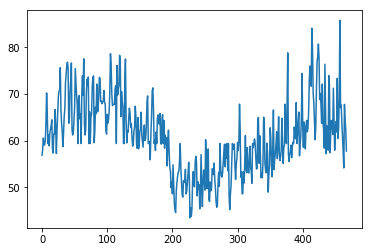

In [22]:
#predicting values and converting to DataFrame
Y_pred=pd.DataFrame(clf.predict(X_test))

#renaming the columns according to its characteristics
Y_pred.rename(columns={0:'temp'}, inplace=True)

plt.plot(Y_pred)

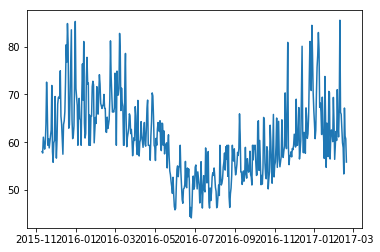

In [23]:
plt.plot(Y_test)

In [24]:
#setting the timestamp index in the predicted DataFrame
Y_pred.set_index(Y_test.index, inplace=True)
Y_pred.head()


,temp
datetime,
2015-11-10 00:00:00+00:00,56.905093
2015-11-11 00:00:00+00:00,58.142279
2015-11-12 00:00:00+00:00,60.567280
2015-11-13 00:00:00+00:00,59.084868
2015-11-14 00:00:00+00:00,59.096271


Text(0.5, 1.0, 'RMSE: 1.6112')

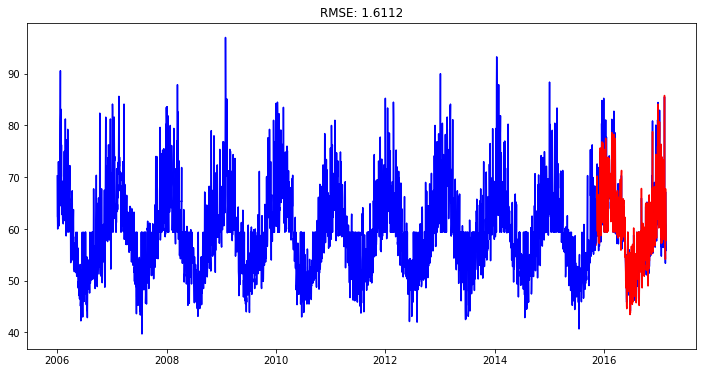

In [25]:
#plotting the predictions and test values
plt.figure(figsize=(12,6))
plt.plot(Y_test, color='blue')
plt.plot(Y_pred, color='red')
plt.plot(Y_train, color='blue')

#calculating RMSE values
plt.title('RMSE: %.4f'% np.sqrt(sum((Y_pred.temp-Y_test.temp)**2)/len(Y_test)))


In [26]:
#predicted Values
Y_pred.head()

,temp
datetime,
2015-11-10 00:00:00+00:00,56.905093
2015-11-11 00:00:00+00:00,58.142279
2015-11-12 00:00:00+00:00,60.567280
2015-11-13 00:00:00+00:00,59.084868
2015-11-14 00:00:00+00:00,59.096271
